In [5]:
import compute_interaction_scores as cis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
# Generate input
lr_pairs_dir = "/Users/joankant/Desktop/gaitigroup/Users/Joan/RaCInG/Data/lr_pairs"

cellfrac_path = "/Users/joankant/Desktop/gaitigroup/Users/Joan/RaCInG/output/GBM/21_deconv_post"

lr_weights_dir = "/Users/joankant/Desktop/gaitigroup/Users/Joan/RaCInG/output/GBM/30_compute_lr_pair_weights"

output_dir = "/Users/joankant/Desktop/gaitigroup/Users/Joan/RaCInG/output/GBM/40_compute_interaction_scores"

metadata = pd.read_csv("/Users/joankant/Desktop/gaitigroup/Users/Joan/RaCInG/output/GBM/GBM_Neftel2019_subtypes.csv")

if (not os.path.exists(output_dir)):
    os.makedirs(output_dir)

weight_type = "min"
cancer_name = "GBM"
# liglist, reclist, Dcell, Dconn, cellnames, ligands, receptors, _  = input_gen.generateInput(weight_type, cancer_name, cellfrac_path = cellfrac_path, lr_weights_dir = lr_weights_dir, lr_pairs_dir = lr_pairs_dir)


# Compute interaction scores
weights = cis.compute_interaction_scores(weight_type = weight_type, cellfrac_path = cellfrac_path, lr_weights_dir = lr_weights_dir, lr_pairs_dir = lr_pairs_dir, source_cell_type = "Tumor", target_cell_type = "M", output_dir = output_dir, cancer_name = cancer_name, is_directed = True)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


KeyboardInterrupt: 

In [28]:
g1 = "MES-like"
g2 = "AC-like"

In [29]:
scoresA = np.average(weights[:, :, np.array(metadata.Neftel3)  == g1
], axis = 2)

scoresB = np.average(weights[:, :, np.array(metadata.Neftel3)  == g2], axis = 2)

 # Find max scores
maxIndA = np.unravel_index(np.argsort(scoresA, axis=None), scoresA.shape)
maxIndB = np.unravel_index(np.argsort(scoresB, axis=None), scoresB.shape)

In [36]:
# Highlight top tresh interactions and exctract their value and labels
thresh = 50
bestLigA = ligands[maxIndA[0][-thresh:]]
bestLigB = ligands[maxIndB[0][-thresh:]]
bestRecA = receptors[maxIndA[1][-thresh:]]
bestRecB = receptors[maxIndB[1][-thresh:]]
maxA1 = scoresA[maxIndA[0][-thresh:], maxIndA[1][-thresh:]]
maxA2 = scoresA[maxIndB[0][-thresh:], maxIndB[1][-thresh:]]
maxB1 = scoresB[maxIndA[0][-thresh:], maxIndA[1][-thresh:]]
maxB2 = scoresB[maxIndB[0][-thresh:], maxIndB[1][-thresh:]]
maxValA = np.concatenate((maxA1, maxA2))
maxValB = np.concatenate((maxB1, maxB2))
plotlabels1 = ["{}_{}".format(bestLigA[i], bestRecA[i])
                for i in range(len(bestLigA))]
plotlabels2 = ["{}_{}".format(bestLigB[i], bestRecB[i])
                for i in range(len(bestLigB))]
plotlabels, indices = np.unique(
    plotlabels1 + plotlabels2, return_index=True)
maxValA = maxValA[indices]
maxValB = maxValB[indices]

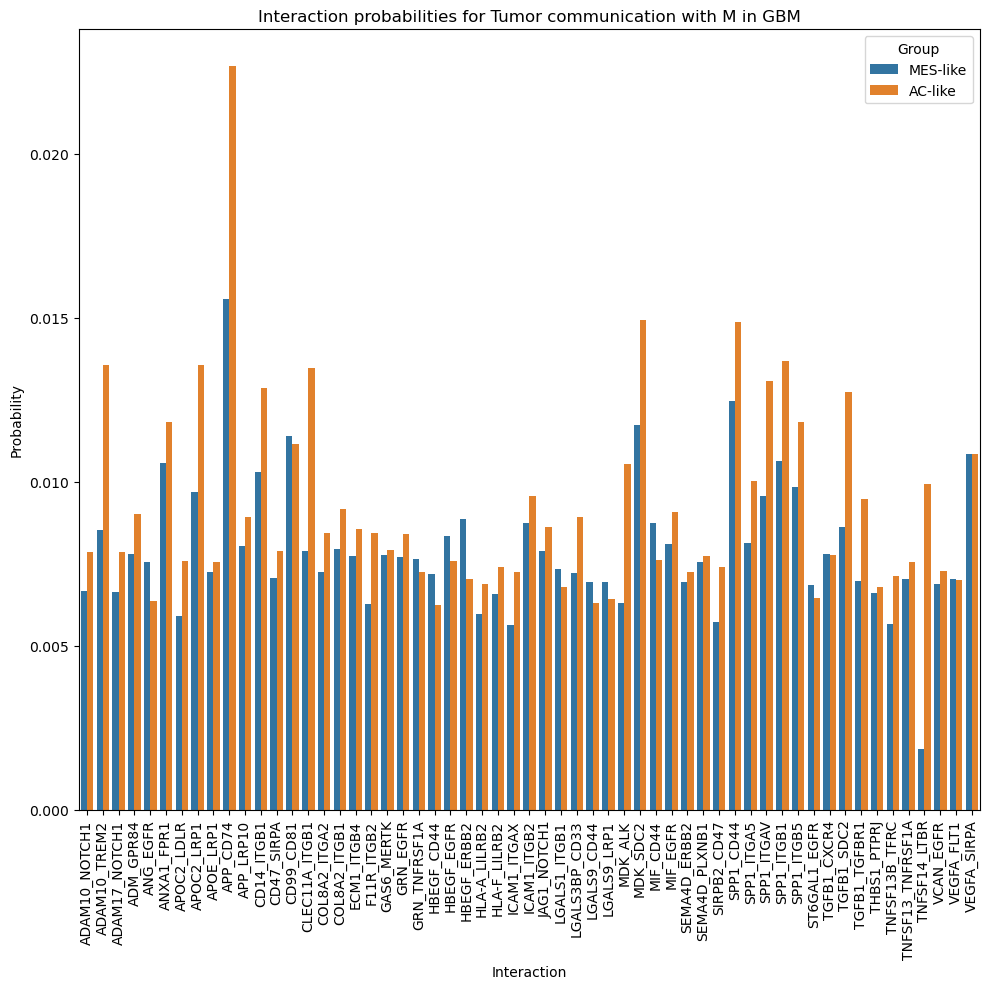

In [37]:
dictn = {"Interaction": np.tile(plotlabels, 2),
            "Group": np.concatenate((np.repeat(g1, len(plotlabels)), np.repeat(g2, len(plotlabels)))),
            "Probability": np.concatenate((maxValA, maxValB))}
df = pd.DataFrame(dictn)

plt.figure(figsize=(10, 10))
plt.title("Interaction probabilities for {} communication with {} in {}".format(
        "Tumor", "M", "GBM"))
sns.barplot(data=df, x="Interaction", y="Probability", hue="Group")
plt.xticks(rotation='vertical')
plt.tight_layout()